### Sequence where y_i = xor(x_1, x_2, ... x_i)

In [53]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as opt
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [54]:
class Model(nn.Module):
    def __init__(self, hidden_size, x_size, y_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.x_size = x_size
        self.y_size = y_size
        
        self.Waa = nn.Linear(hidden_size, hidden_size)
        self.Wax = nn.Linear(x_size, hidden_size)
        self.g1 = nn.Tanh()
        
        self.Wya = nn.Linear(hidden_size, y_size)
    
    def forward(self, x, a):
        new_a = self.g1(self.Waa(a) + self.Wax(x))
        return self.Wya(new_a), new_a

In [55]:
def geseq_len():
    n = 20
    x = torch.rand(n).round()
    summ = 0
    y = []
    for i in range(n):
        summ += x[i].item()
        y.append(summ % 2)
    y = torch.FloatTensor(y)
    return x.view(-1, 1), y.view(-1, 1), n

  0%|          | 0/9999 [00:00<?, ?it/s]

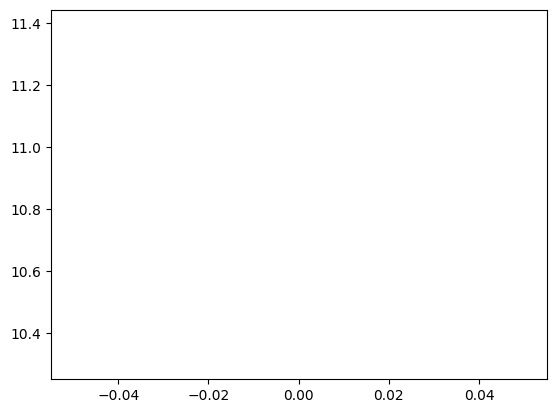

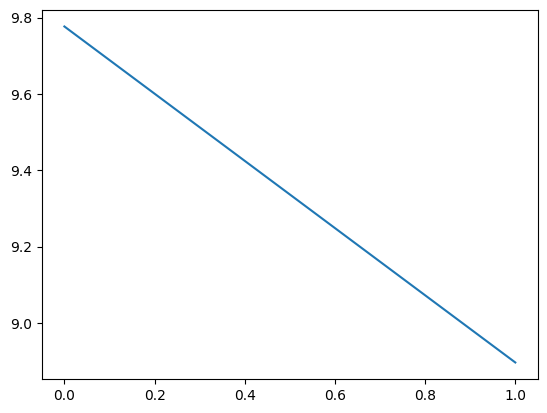

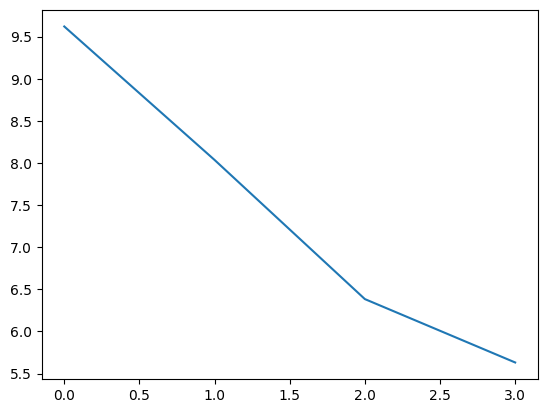

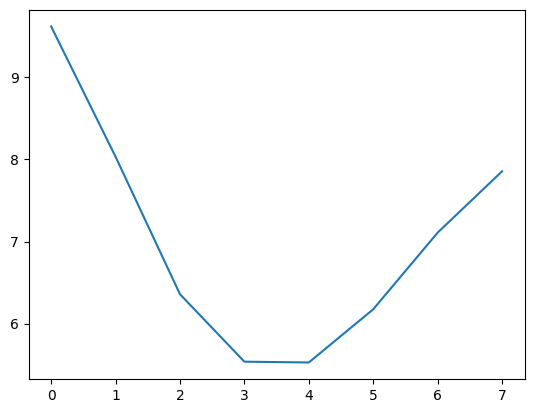

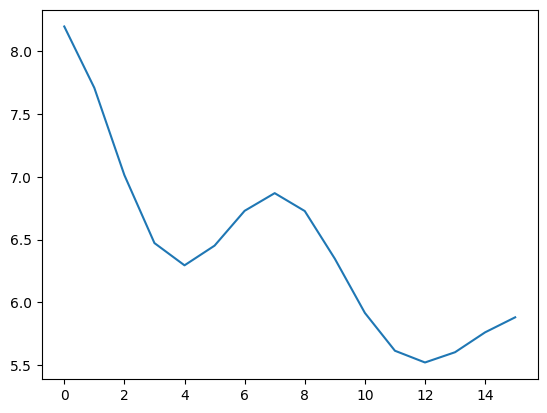

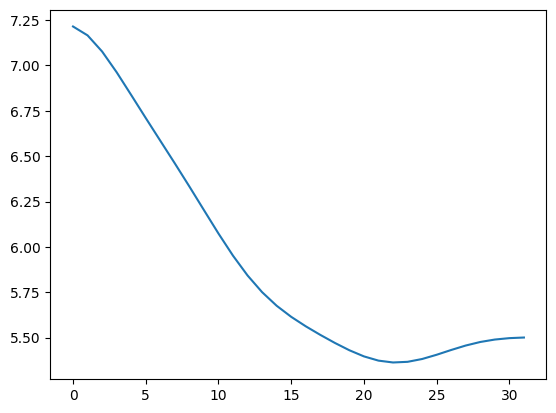

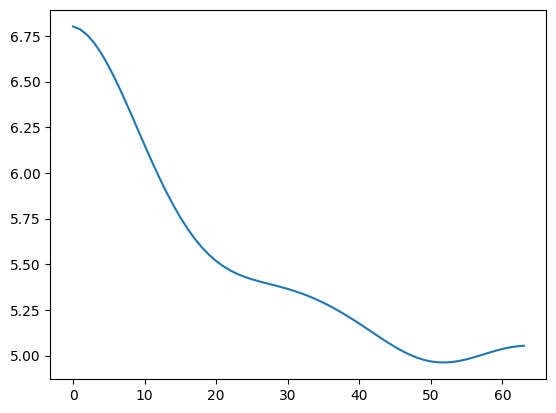

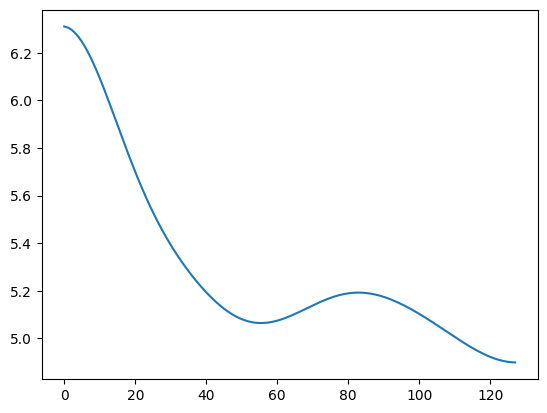

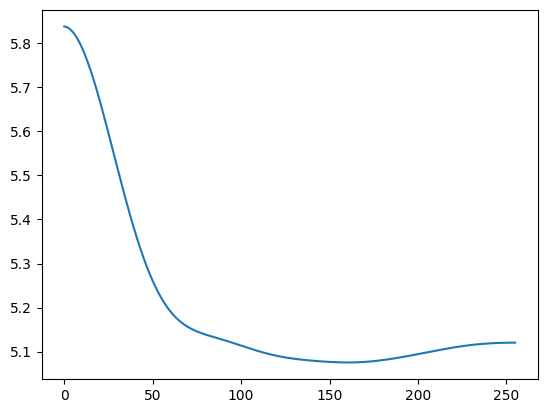

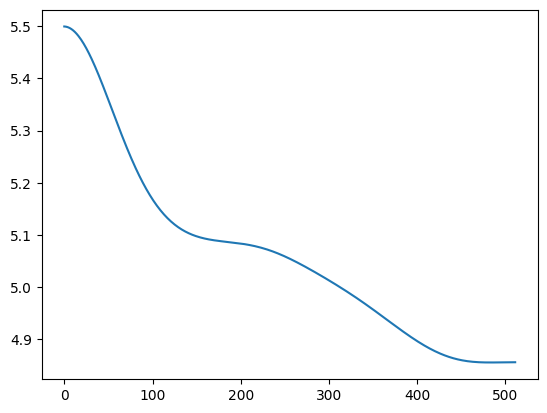

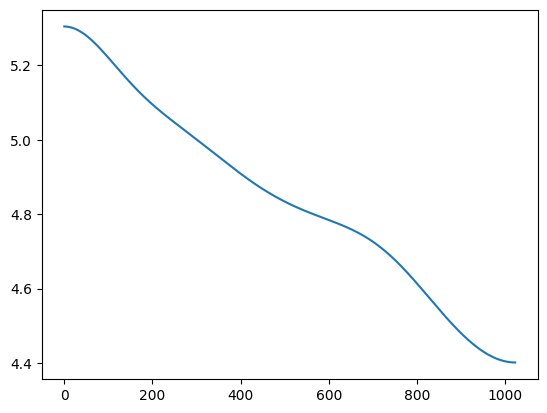

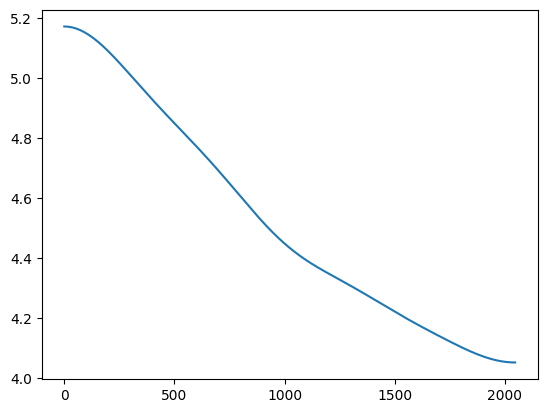

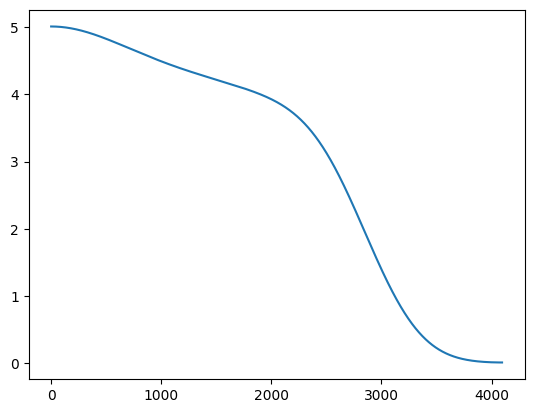

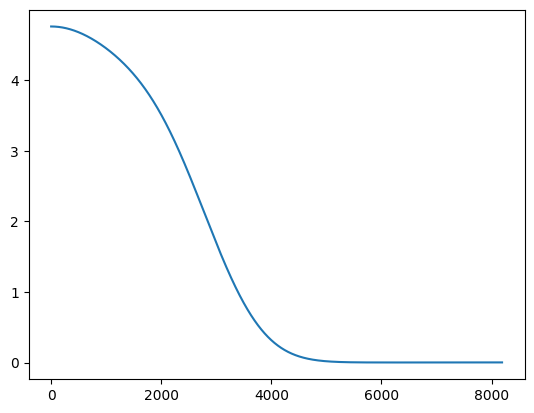

In [56]:
hsize = 100
net = Model(hsize, 1, 1)
optimizer = torch.optim.Adam(net.parameters())
losses = []
from scipy.ndimage import gaussian_filter1d

epochs = 10000
for i in tqdm(range(1, epochs)):
    a = torch.zeros(hsize)
    loss = 0
    
    x, y, n = geseq_len()
    
    for it in range(n):
        y_pred, a = net(x[it], a)
        loss += F.mse_loss(y_pred, y[it])
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if i & (i - 1) == 0:
        plt.plot(gaussian_filter1d(losses, i // 10 + 1))
        plt.show()

In [57]:
losses2 = []

epochs = 200
for i in tqdm(range(1, epochs)):
    a = torch.zeros(hsize)
    loss = 0
    
    x, y, n = geseq_len()
    
    for it in range(n):
        y_pred, a = net(x[it], a)
        loss += F.mse_loss(y_pred, y[it])
    

    losses2.append(loss.item())
(sum(losses2) / len(losses2))

  0%|          | 0/199 [00:00<?, ?it/s]

0.003787899231327576

In [58]:

for i in tqdm(range(1, 10)):
    a = torch.zeros(hsize)
    
    x, y, n = geseq_len()
    loss = 0
    
    for it in range(n):
        y_pred, a = net(x[it], a)
        loss += F.mse_loss(y_pred, y[it])
    
    print(loss.item())

  0%|          | 0/9 [00:00<?, ?it/s]

0.0011568693444132805
0.004923851694911718
0.005461882334202528
0.00422483216971159
0.0026444089598953724
0.002656858181580901
0.00198518973775208
0.0035557274241000414
0.002337848301976919


In [59]:
for name, par in net.named_parameters():
    print(name, par)


Waa.weight Parameter containing:
tensor([[-0.0863, -0.0029,  0.0467,  ..., -0.0740, -0.0355, -0.0386],
        [ 0.0568, -0.0614, -0.0039,  ..., -0.1036,  0.0344,  0.0569],
        [ 0.0025, -0.0448, -0.0516,  ...,  0.0225,  0.0313, -0.0604],
        ...,
        [-0.0168, -0.1539,  0.0295,  ...,  0.1643, -0.0832, -0.0718],
        [ 0.1520, -0.0338,  0.1401,  ...,  0.0323,  0.1141,  0.1160],
        [-0.0048, -0.0749, -0.0059,  ...,  0.0294, -0.0636, -0.0934]],
       requires_grad=True)
Waa.bias Parameter containing:
tensor([ 0.0134, -0.1424,  0.1181, -0.0456,  0.0811,  0.0380, -0.1004,  0.0081,
        -0.0316,  0.1064,  0.1834, -0.1002, -0.0228,  0.1255,  0.0095, -0.0761,
         0.0846,  0.0007,  0.0895, -0.1021, -0.0346,  0.0700,  0.0280,  0.0315,
         0.1025, -0.0115,  0.0966, -0.1232, -0.0952, -0.0628,  0.1354, -0.0160,
         0.0043, -0.0829,  0.1521, -0.0229, -0.0623,  0.0969,  0.0569, -0.0773,
         0.0236, -0.0443, -0.0639, -0.1927, -0.0202, -0.0372,  0.0558, -0.0